# Entrega 1
## Exploración de Datos
Este notebook contiene una exploración básica del archivo train.csv.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import os

In [ ]:
# Cargar json
files.upload()

In [ ]:
# Cargar competencia de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [7]:
# descomprimir archivos
!unzip udea*.zip > /dev/null
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [8]:
# Cargar archivo train.csv
file = "train.csv"
df = pd.read_csv(file)
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


# 1. Exploración inicial

In [ ]:
# Mostrar primeras filas, info y descripción
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500,692500,686213,661643,660363,665871,669322,652727,...,692500,686002,654397,665871,668836,692500,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,NaN,948,31,8,5,7,2,12,2,...,2,2,2,2,12,4,NaN,NaN,NaN,NaN
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,NaN,NaN,NaN,NaN
freq,NaN,NaN,53244,282159,204048,249352,232671,592514,128289,563390,...,692466,382201,597670,592514,141744,175619,NaN,NaN,NaN,NaN
mean,494606.130576,20198.366679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.314000,0.309000,0.293000,0.303000


### 1. Número de estudiantes por programa académico

In [ ]:
# Cantidad de estudiantes por programa
df_estudiantes_por_programa = df["ESTU_PRGM_ACADEMICO"].value_counts()
df_estudiantes_por_programa

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


### 2. Estudiantes con/sin internet y con/sin computador

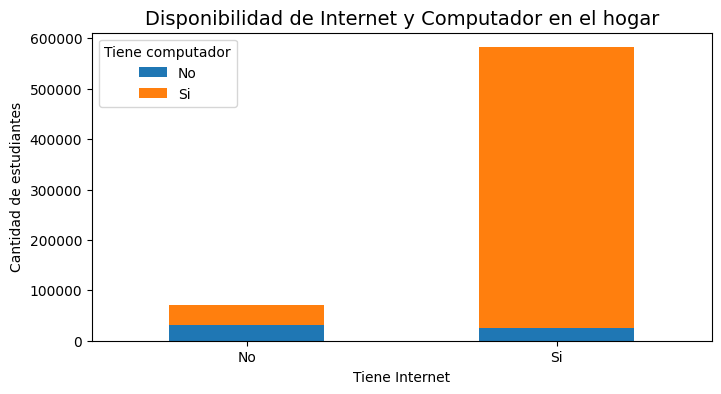

In [ ]:
# Agrupar por internet y computador
ic = (
    df.groupby(["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR"])
    .size()
    .unstack(fill_value=0)
)
fig, ax = plt.subplots(figsize=(8, 4))
ic.plot(kind="bar", stacked=True, ax=ax)
ax.set_title("Disponibilidad de Internet y Computador en el hogar", fontsize=14)
ax.set_xlabel("Tiene Internet")
ax.set_ylabel("Cantidad de estudiantes")
ax.legend(title="Tiene computador")
plt.xticks(rotation=0)
plt.show()

### 3. Gráfico de horas semanales que trabajan los estudiantes

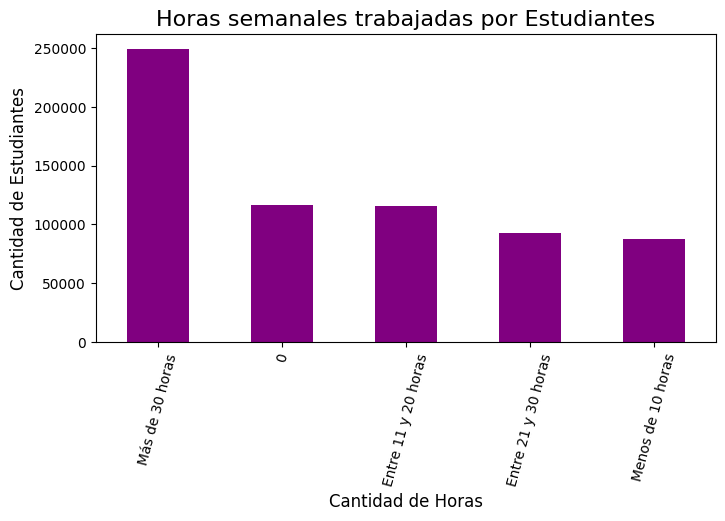

In [ ]:
# Cantidad de horas que trabajan los estudiantes a la semana
df_trabajo_por_semana_estudiantes = df["ESTU_HORASSEMANATRABAJA"].value_counts()

# Crear grafico
fig, ax = plt.subplots(figsize=(8, 4))
df_trabajo_por_semana_estudiantes.plot(kind="bar", ax=ax, color="purple")
plt.title("Horas semanales trabajadas por Estudiantes", fontsize=16)
plt.xlabel("Cantidad de Horas", fontsize=12)
plt.ylabel("Cantidad de Estudiantes", fontsize=12)
plt.xticks(rotation=75)
plt.show()

### 4. Top 5 departamentos con más estudiantes



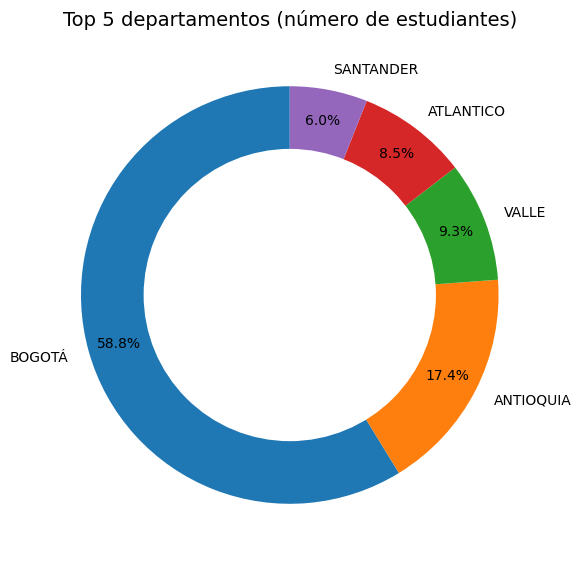

In [ ]:
top5 = df["ESTU_PRGM_DEPARTAMENTO"].value_counts().head(5)
fig, ax = plt.subplots(figsize=(6, 6))
top5.plot(kind="pie", autopct="%1.1f%%", startangle=90, pctdistance=0.85)
# círculo en el centro
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)
ax.set_ylabel("")
ax.set_title("Top 5 departamentos (número de estudiantes)", fontsize=14)
plt.tight_layout()
plt.show()